In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%config InlineBackend.figure_formats = ['svg']

In [3]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['FreeSans']
# matplotlib.rc('pdf', fonttype=42)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [5]:
# Ground truth MDP model
MDP_parameters = joblib.load('../data/MDP_parameters.joblib')
P = MDP_parameters['transition_matrix_absorbing'] # (A, S, S_next)
R = MDP_parameters['reward_matrix_absorbing_SA'] # (S, A)
nS, nA = R.shape
gamma = 0.99

# unif rand isd, mixture of diabetic state
PROB_DIAB = 0.2
isd = joblib.load('../data/modified_prior_initial_state_absorbing.joblib')
isd = (isd > 0).astype(float)
isd[:720] = isd[:720] / isd[:720].sum() * (1-PROB_DIAB)
isd[720:] = isd[720:] / isd[720:].sum() * (PROB_DIAB)

# Optimal value function and optimal return
V_star = joblib.load('../data/V_π_star_PE.joblib')
J_star = V_star @ isd

In [6]:
num_runs = 10

In [7]:
to_plot = 'Regret'

## Exp HP

In [8]:
eps_list = [0, 0.01, 0.05, 0.10, 0.50, 1]
df_WIS_eps = [pd.read_csv('./results/run{}/sepsis-cont-WIS_eps.csv'.format(run), index_col=0) for run in range(num_runs)]
regrets_WIS_eps = pd.concat([df.loc[to_plot].rename(i) for i, df in enumerate(df_WIS_eps)], axis=1).T
regrets_WIS_eps.columns = eps_list
regrets_WIS_eps.columns.name = 'WIS (eps)'

In [9]:
regrets_WIS_eps

WIS (eps),0.00,0.01,0.05,0.10,0.50,1.00
0,0.171243,0.171243,0.171243,0.126943,0.126943,1.583253
1,0.120801,0.120801,0.120801,0.120801,1.357851,1.565357
2,0.028417,0.028417,0.028417,0.028417,0.543785,1.609901
3,0.023009,0.023009,0.023009,0.023009,0.023009,1.555961
4,0.148325,0.148325,0.028971,0.028971,0.028971,1.577141
5,0.196221,0.196221,0.196509,0.196509,0.058188,1.535306
6,0.111945,0.111945,0.111945,0.111945,0.793513,1.487984
7,0.049025,0.049025,0.049025,0.049025,0.108497,1.602708
8,0.450614,0.450614,0.113560,0.113560,0.282457,1.588768
9,0.163728,0.163728,0.163728,0.235047,0.235047,1.523516


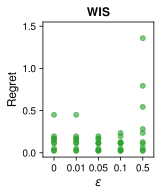

In [10]:
df = regrets_WIS_eps.agg(['min', 'median', 'max'])
color = 'tab:green'
mark = 'o'
_, ncases = df.shape

fig, ax = plt.subplots(figsize=(2,2.5))
xpos = np.arange(ncases)

yvals = regrets_WIS_eps.values.T.reshape((ncases, num_runs))
plt.plot(xpos, yvals, ls='None', c=color, marker='o', markersize=5, markeredgewidth=1, zorder=10, alpha=0.6)

plt.ylim(-0.05, 1.55)
plt.yticks([0, 0.5, 1, 1.5])

plt.xticks(range(len(eps_list)), eps_list)
plt.xlim(-0.5, 4.5)
plt.xlabel('$\epsilon$', fontsize=12)
plt.ylabel(to_plot, fontsize=12)
plt.title('WIS', fontsize=12, fontweight='bold')
plt.savefig('fig/sepsis-cont-exp-HP-WIS_eps.pdf', bbox_inches='tight')
plt.show()

In [11]:
num_runs = 10

In [12]:
L_list = [1, 5, 10, 20, 50]
df_AM_L = [pd.read_csv('./results/run{}/sepsis-cont-AM_L.csv'.format(run), index_col=0) for run in range(num_runs)]
regrets_AM_L = pd.concat([df.loc[to_plot].rename(i) for i, df in enumerate(df_AM_L)], axis=1).T
regrets_AM_L.columns = L_list
regrets_AM_L.columns.name = 'AM (H)'

In [13]:
regrets_AM_L

AM (H),1,5,10,20,50
0,0.453595,0.453595,0.453595,0.453595,0.453595
1,0.467449,0.467449,0.467449,0.467449,0.467449
2,0.445472,0.445472,0.445472,0.445472,0.445472
3,0.186933,0.186933,0.186933,0.186933,0.186933
4,0.427709,0.427709,0.427709,0.427709,0.427709
5,0.155085,0.155085,0.155085,0.155085,0.155085
6,0.092935,0.092935,0.092935,0.092935,0.092935
7,0.341566,0.341566,0.341566,0.341566,0.341566
8,0.200099,0.200099,0.200099,0.200099,0.200099
9,0.355882,0.355882,0.355882,0.355882,0.355882


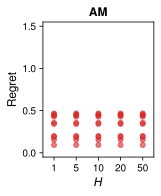

In [14]:
df = regrets_AM_L.agg(['min', 'median', 'max'])
color = 'tab:red'
mark = 'd'
_, ncases = df.shape

fig, ax = plt.subplots(figsize=(2,2.5))
yval, ylo, yhi = df.loc['median'], df.loc['min'], df.loc['max']
yerrs = np.array([yval-ylo, yhi-yval])
xpos = np.arange(ncases)
# plt.errorbar(xpos, yval, yerr=yerrs, c=color, lw=1.75, elinewidth=0.8, capsize=3, ls='-', alpha=0.8)
# plt.plot(xpos, yval, ls='None', c=color, marker=mark, markersize=5, zorder=10)

yvals = regrets_AM_L.values.T.reshape((ncases, num_runs))
plt.plot(xpos, yvals, ls='None', c=color, marker='o', markersize=5, markeredgewidth=1, zorder=10, alpha=0.6)
# plt.ylim(0.0, 0.4)

# plt.axhline(np.median(min_regrets), c='k')
# plt.axhspan(np.min(min_regrets), np.max(min_regrets), facecolor='gray', alpha=0.1)
plt.ylim(-0.05, 1.55)
plt.yticks([0, 0.5, 1, 1.5])

# ax.tick_params(axis='x', length=0)
plt.xticks(range(len(L_list)), L_list)
plt.xlim(-0.5, 4.5)
plt.xlabel('$H$', fontsize=12)
plt.ylabel(to_plot, fontsize=12)
plt.title('AM', fontsize=12, fontweight='bold')
plt.savefig('fig/sepsis-cont-exp-HP-AM_L.pdf', bbox_inches='tight')
plt.show()

In [15]:
num_runs = 10

In [16]:
L_list = [1, 5, 10, 20, 50]
df_FQE_L = [pd.read_csv('./results/run{}/sepsis-cont-FQE_L.csv'.format(run), index_col=0) for run in range(num_runs)]
regrets_FQE_L = pd.concat([df.loc[to_plot].rename(i) for i, df in enumerate(df_FQE_L)], axis=1).T
regrets_FQE_L.columns = L_list
regrets_FQE_L.columns.name = 'FQE (H)'

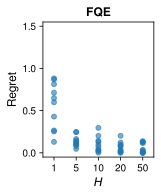

In [17]:
df = regrets_FQE_L.agg(['min', 'median', 'max'])
color = 'tab:blue'
mark = '^'
_, ncases = df.shape

fig, ax = plt.subplots(figsize=(2,2.5))
yval, ylo, yhi = df.loc['median'], df.loc['min'], df.loc['max']
yerrs = np.array([yval-ylo, yhi-yval])
xpos = np.arange(ncases)
# plt.errorbar(xpos, yval, yerr=yerrs, c=color, lw=1.75, elinewidth=0.8, capsize=3, ls='-', alpha=0.8)
# plt.plot(xpos, yval, ls='None', c=color, marker=mark, markersize=5, zorder=10)

yvals = regrets_FQE_L.values.T.reshape((ncases, num_runs))
plt.plot(xpos, yvals, ls='None', c=color, marker='o', markersize=5, markeredgewidth=1, zorder=10, alpha=0.6, clip_on=False)

# plt.axhline(np.median(min_regrets), c='k')
# plt.axhspan(np.min(min_regrets), np.max(min_regrets), facecolor='gray', alpha=0.1)
plt.ylim(-0.05, 1.55)
plt.yticks([0, 0.5, 1, 1.5])

# ax.tick_params(axis='x', length=0)
plt.xticks(range(len(L_list)), L_list)
plt.xlim(-0.5, 4.5)
plt.xlabel('$H$', fontsize=12)
plt.ylabel(to_plot, fontsize=12)
plt.title('FQE', fontsize=12, fontweight='bold')
plt.savefig('fig/sepsis-cont-exp-HP-FQE_L.pdf', bbox_inches='tight')
plt.show()